# Projet 3 : Concevez une application au service de la santé publique

# Imputation de nutriscore

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn settings
plt.style.use("seaborn-whitegrid") 
# seaborn settings
#plt.style.use("seaborn-whitegrid") 
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
#sns.set_theme(style="ticks")

In [2]:
data = pd.read_csv('data/en_openfoodfacts_org_products_nutriscore.csv',
                   #sep='\t', # The character that separates fields is <tab> (tabulation).
                   encoding='utf-8', # The file encoding is Unicode UTF-8.
                   #index_col='product_name'
                  )

In [3]:
data

,produit,categorie,pays,nutriscore_score,nutriscore_grade,gras_100g,gras-sature_100g,sucre_100g,energie_100g,nova_group
0,Vitória crackers,NaN,France,NaN,NaN,7.0,3.08,15.0,1569.0,NaN
1,moutarde au moût de raisin,"Groceries,Condiments,Sauces,Mustards",France,18.0,d,8.2,2.20,22.0,936.0,NaN
2,Sauce sweety chili 0%,NaN,France,NaN,NaN,0.0,0.00,0.4,88.0,NaN
3,Sachet calisson,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pate d'amende,fr:pate-d-amende,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
538330,Steak haché,"Meats,Beef,Steaks,Beef steaks,Ground steaks,Gr...",France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538331,Boules,NaN,France,NaN,NaN,11.0,1.30,54.0,1556.0,NaN
538332,Minis beignets,"Snacks,Sweet snacks,Sweet Fritters",France,15.0,d,20.2,6.00,10.4,1393.0,NaN
538333,Steak haché pur boeuf,"Meats,Beef,Steaks,Beef steaks,Ground steaks,Gr...",France,-2.0,a,5.0,2.30,0.0,548.0,NaN


In [6]:
data['nutriscore_grade'].isna().sum()*100 / data.shape[0]

53.12814950117097

In [4]:
# laisse tomber tout les valeurs nulles pour 4 indicateurs
data.dropna(subset=['gras_100g',
                    'gras-sature_100g',
                    'sucre_100g',
                    'energie_100g'], how='any', inplace=True)

In [5]:
data

,produit,categorie,pays,nutriscore_score,nutriscore_grade,gras_100g,gras-sature_100g,sucre_100g,energie_100g,nova_group
0,Vitória crackers,NaN,France,NaN,NaN,7.0,3.08,15.0,1569.0,NaN
1,moutarde au moût de raisin,"Groceries,Condiments,Sauces,Mustards",France,18.0,d,8.2,2.20,22.0,936.0,NaN
2,Sauce sweety chili 0%,NaN,France,NaN,NaN,0.0,0.00,0.4,88.0,NaN
5,&quot;baguette lyonnais&quot;,NaN,France,NaN,NaN,9.4,4.50,2.0,1213.0,NaN
6,Solène céréales poulet,NaN,France,NaN,NaN,5.9,0.50,1.7,916.0,4.0
...,...,...,...,...,...,...,...,...,...,...
538390,Riz parfumé,"Plant-based foods and beverages,Plant-based fo...",France,0.0,b,0.5,0.00,0.0,1469.0,NaN
538393,Boules,NaN,France,NaN,NaN,11.0,1.30,54.0,1556.0,NaN
538394,Minis beignets,"Snacks,Sweet snacks,Sweet Fritters",France,15.0,d,20.2,6.00,10.4,1393.0,NaN
538395,Steak haché pur boeuf,"Meats,Beef,Steaks,Beef steaks,Ground steaks,Gr...",France,-2.0,a,5.0,2.30,0.0,548.0,NaN


In [83]:
data_2 = data.reset_index()

In [84]:
data_2

,index,produit,categorie,pays,nutriscore_score,nutriscore_grade,gras_100g,gras-sature_100g,sucre_100g,energie_100g,nova_group
0,0,Vitória crackers,NaN,France,NaN,NaN,7.0,3.08,15.0,1569.0,NaN
1,1,moutarde au moût de raisin,"Groceries,Condiments,Sauces,Mustards",France,18.0,d,8.2,2.20,22.0,936.0,NaN
2,2,Sauce sweety chili 0%,NaN,France,NaN,NaN,0.0,0.00,0.4,88.0,NaN
3,5,&quot;baguette lyonnais&quot;,NaN,France,NaN,NaN,9.4,4.50,2.0,1213.0,NaN
4,6,Solène céréales poulet,NaN,France,NaN,NaN,5.9,0.50,1.7,916.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
481281,538390,Riz parfumé,"Plant-based foods and beverages,Plant-based fo...",France,0.0,b,0.5,0.00,0.0,1469.0,NaN
481282,538393,Boules,NaN,France,NaN,NaN,11.0,1.30,54.0,1556.0,NaN
481283,538394,Minis beignets,"Snacks,Sweet snacks,Sweet Fritters",France,15.0,d,20.2,6.00,10.4,1393.0,NaN
481284,538395,Steak haché pur boeuf,"Meats,Beef,Steaks,Beef steaks,Ground steaks,Gr...",France,-2.0,a,5.0,2.30,0.0,548.0,NaN


In [28]:
data_dropped =  data.drop(["produit",'pays','categorie','nutriscore_grade','nova_group'], axis=1)
data_dropped

,nutriscore_score,gras_100g,gras-sature_100g,sucre_100g,energie_100g
0,NaN,7.0,3.08,15.0,1569.0
1,18.0,8.2,2.20,22.0,936.0
2,NaN,0.0,0.00,0.4,88.0
5,NaN,9.4,4.50,2.0,1213.0
6,NaN,5.9,0.50,1.7,916.0
...,...,...,...,...,...
538390,0.0,0.5,0.00,0.0,1469.0
538393,NaN,11.0,1.30,54.0,1556.0
538394,15.0,20.2,6.00,10.4,1393.0
538395,-2.0,5.0,2.30,0.0,548.0


Text(0.5, 1.0, 'Nutri-score avant imputation k-NN\n')

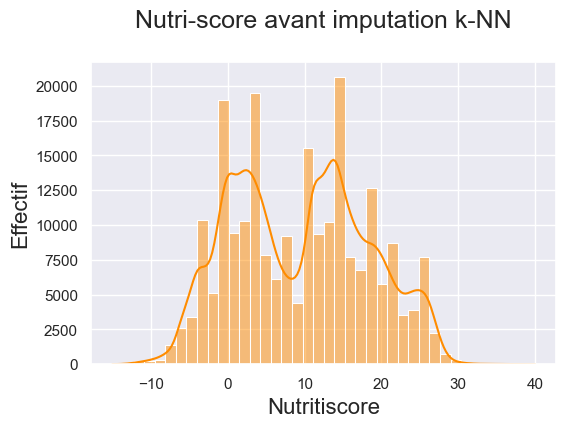

In [29]:
# Distribution de nutriscore avant imputation
p = sns.histplot(x=data_dropped["nutriscore_score"], kde=True, bins=40, color = "darkorange")
p.set_xlabel ("Nutritiscore", fontsize=16)
p.set_ylabel ("Effectif", fontsize=16)
p.set_title("Nutri-score avant imputation k-NN\n", fontsize=18)

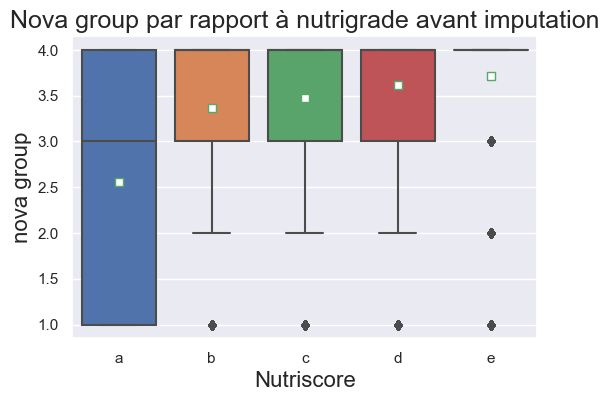

In [30]:
# fig = plt.figure(figsize=(20,10))

n = sns.boxplot(y = data['nova_group'],
            x = data['nutriscore_grade'],
            data=data[data['nova_group']!=np.nan],
            saturation=0.9,
            order=["a", "b", "c", "d", "e"],
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            )
n.set_xlabel ("Nutriscore", fontsize=16)
n.set_ylabel ("nova group", fontsize=16)
n.set_title("Nova group par rapport à nutrigrade avant imputation", fontsize=18)
plt.show()

<Figure size 1600x600 with 0 Axes>

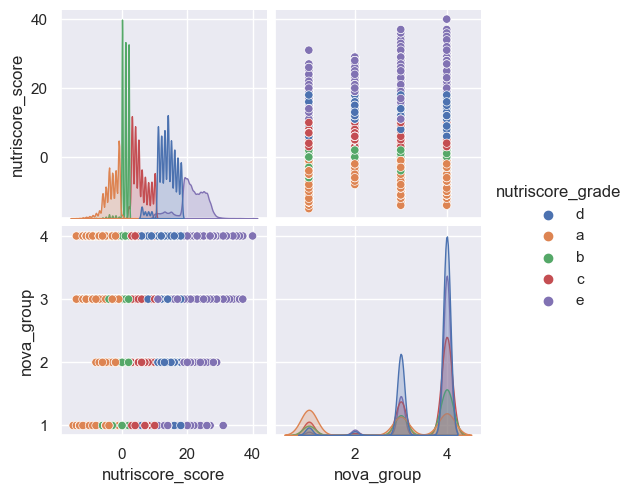

In [31]:
plt.figure(figsize=(16, 6))
sns.pairplot(data[['nutriscore_score', 'nova_group', 'nutriscore_grade']], hue='nutriscore_grade')
plt.show()

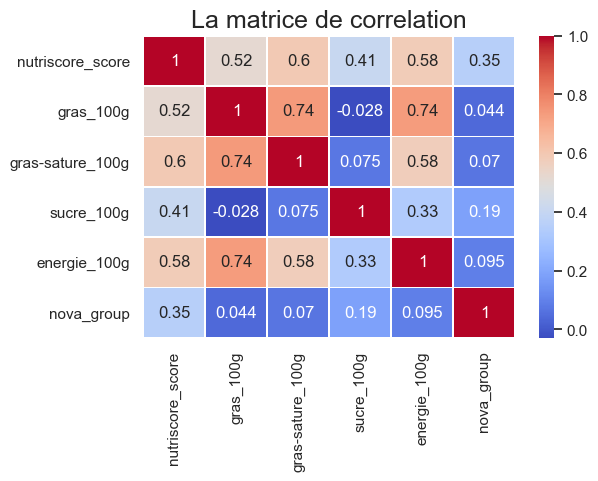

In [32]:
ax = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
ax.set_title('La matrice de correlation', fontsize=18)
plt.show()

In [33]:
print("moyenne avant:",data_dropped["nutriscore_score"].mean())
print("mediane avant:",data_dropped["nutriscore_score"].median())
print("std avant:",data_dropped["nutriscore_score"].std(ddof=0))
print("skw avant:",data_dropped["nutriscore_score"].skew())
print("kur avant:",data_dropped["nutriscore_score"].kurtosis())

moyenne avant: 9.429067262427193
mediane avant: 10.0
std avant: 8.828784403178467
skw avant: 0.11560477812197563
kur avant: -0.935612659072417


In [34]:
# Imputation avec KNN
from sklearn.impute import KNNImputer
from sklearn import neighbors

In [35]:
cols_to_norm = ['gras_100g',
                'gras-sature_100g',
                'sucre_100g',
                'energie_100g']
data_dropped[cols_to_norm] = data_dropped[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

In [36]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481286 entries, 0 to 538396
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   nutriscore_score  225594 non-null  float64
 1   gras_100g         481286 non-null  float64
 2   gras-sature_100g  481286 non-null  float64
 3   sucre_100g        481286 non-null  float64
 4   energie_100g      481286 non-null  float64
dtypes: float64(5)
memory usage: 38.2 MB


In [37]:
#Imputation KNN avec K = 3:
imputer = KNNImputer(n_neighbors=3)
data_imputed = pd.DataFrame(imputer.fit_transform(data_dropped), columns = data_dropped.columns)

### ==> data_imputed est le dataframe après d'imputation les NaN de la colonne nutriscore avec la méthode k-NN(k=3)

In [38]:
data_imputed

,nutriscore_score,gras_100g,gras-sature_100g,sucre_100g,energie_100g
0,1.000000,-0.062449,-0.020775,0.006919,0.119191
1,18.000000,-0.050449,-0.029575,0.076919,-0.051890
2,0.333333,-0.132449,-0.051575,-0.139081,-0.281079
3,9.333333,-0.038449,-0.006575,-0.123081,0.022975
4,0.000000,-0.073449,-0.046575,-0.126081,-0.057295
...,...,...,...,...,...
481281,0.000000,-0.127449,-0.051575,-0.143081,0.092164
481282,11.000000,-0.022449,-0.038575,0.396919,0.115678
481283,15.000000,0.069551,0.008425,-0.039081,0.071624
481284,-2.000000,-0.082449,-0.028575,-0.143081,-0.156755


In [81]:
recuperer_produit = data.dropna(subset=['gras_100g',
                                        'gras-sature_100g',
                                        'sucre_100g',
                                        'energie_100g'], how='any')

In [82]:
recuperer_produit

,produit,categorie,pays,nutriscore_score,nutriscore_grade,gras_100g,gras-sature_100g,sucre_100g,energie_100g,nova_group
0,Vitória crackers,NaN,France,NaN,NaN,7.0,3.08,15.0,1569.0,NaN
1,moutarde au moût de raisin,"Groceries,Condiments,Sauces,Mustards",France,18.0,d,8.2,2.20,22.0,936.0,NaN
2,Sauce sweety chili 0%,NaN,France,NaN,NaN,0.0,0.00,0.4,88.0,NaN
5,&quot;baguette lyonnais&quot;,NaN,France,NaN,NaN,9.4,4.50,2.0,1213.0,NaN
6,Solène céréales poulet,NaN,France,NaN,NaN,5.9,0.50,1.7,916.0,4.0
...,...,...,...,...,...,...,...,...,...,...
538390,Riz parfumé,"Plant-based foods and beverages,Plant-based fo...",France,0.0,b,0.5,0.00,0.0,1469.0,NaN
538393,Boules,NaN,France,NaN,NaN,11.0,1.30,54.0,1556.0,NaN
538394,Minis beignets,"Snacks,Sweet snacks,Sweet Fritters",France,15.0,d,20.2,6.00,10.4,1393.0,NaN
538395,Steak haché pur boeuf,"Meats,Beef,Steaks,Beef steaks,Ground steaks,Gr...",France,-2.0,a,5.0,2.30,0.0,548.0,NaN


In [85]:
data_produit = list(data_2['produit']) # Récupérer la liste "produits"
data_imputed["produit"] = data_produit # Rajouter la liste "produits" comme étant une nouvelle colonne dans data
data_imputed


,nutriscore_score,gras_100g,gras-sature_100g,sucre_100g,energie_100g,produit
0,1.000000,-0.062449,-0.020775,0.006919,0.119191,Vitória crackers
1,18.000000,-0.050449,-0.029575,0.076919,-0.051890,moutarde au moût de raisin
2,0.333333,-0.132449,-0.051575,-0.139081,-0.281079,Sauce sweety chili 0%
3,9.333333,-0.038449,-0.006575,-0.123081,0.022975,&quot;baguette lyonnais&quot;
4,0.000000,-0.073449,-0.046575,-0.126081,-0.057295,Solène céréales poulet
...,...,...,...,...,...,...
481281,0.000000,-0.127449,-0.051575,-0.143081,0.092164,Riz parfumé
481282,11.000000,-0.022449,-0.038575,0.396919,0.115678,Boules
481283,15.000000,0.069551,0.008425,-0.039081,0.071624,Minis beignets
481284,-2.000000,-0.082449,-0.028575,-0.143081,-0.156755,Steak haché pur boeuf


In [86]:
# Vérifions si les noms ont changé

import random
randomlist = random.sample(range(0, 481286), 10)

for i in randomlist:
    print(data.loc[i, "produit"])
print("="*50)    
for i in randomlist:
    print(recuperer_produit.loc[i, "produit"])

Tartelletes aux pommes
Aiguillettes de poulet panire croustillante
Spearmint chewing gum (sugarfree)
Blédichef couscous des tout petits
Epaule d'agneau jus aux girolles
Georges laporte pâtissier cake a l'orange et au cointreau
Pilpil blé complet concassé bio
Flûtes au sel
100% pure squeezed premium orange juice, orange
Mühlenhof hähnchenbrustfilet
Tartelletes aux pommes
Aiguillettes de poulet panire croustillante
Spearmint chewing gum (sugarfree)
Blédichef couscous des tout petits
Epaule d'agneau jus aux girolles
Georges laporte pâtissier cake a l'orange et au cointreau
Pilpil blé complet concassé bio
Flûtes au sel
100% pure squeezed premium orange juice, orange
Mühlenhof hähnchenbrustfilet


In [88]:
display(data_imputed.loc[34564:34564])

,nutriscore_score,gras_100g,gras-sature_100g,sucre_100g,energie_100g,produit
34564,5.0,-0.032449,-0.040575,-0.113081,0.016218,Boule aux graines tranchée sans gluten


In [90]:
display(data_2.loc[34564:34564])

,index,produit,categorie,pays,nutriscore_score,nutriscore_grade,gras_100g,gras-sature_100g,sucre_100g,energie_100g,nova_group
34564,40937,Boule aux graines tranchée sans gluten,"Plant-based foods and beverages,Plant-based fo...",France,5.0,c,10.0,1.1,3.0,1188.0,NaN


In [91]:
data_nova = list(data_2['nova_group']) # Récupérer la liste "produits"
data_imputed["nova_group"] = data_nova # Rajouter la liste "produits" comme étant une nouvelle colonne dans data
data_imputed

,nutriscore_score,gras_100g,gras-sature_100g,sucre_100g,energie_100g,produit,nova_group
0,1.000000,-0.062449,-0.020775,0.006919,0.119191,Vitória crackers,NaN
1,18.000000,-0.050449,-0.029575,0.076919,-0.051890,moutarde au moût de raisin,NaN
2,0.333333,-0.132449,-0.051575,-0.139081,-0.281079,Sauce sweety chili 0%,NaN
3,9.333333,-0.038449,-0.006575,-0.123081,0.022975,&quot;baguette lyonnais&quot;,NaN
4,0.000000,-0.073449,-0.046575,-0.126081,-0.057295,Solène céréales poulet,4.0
...,...,...,...,...,...,...,...
481281,0.000000,-0.127449,-0.051575,-0.143081,0.092164,Riz parfumé,NaN
481282,11.000000,-0.022449,-0.038575,0.396919,0.115678,Boules,NaN
481283,15.000000,0.069551,0.008425,-0.039081,0.071624,Minis beignets,NaN
481284,-2.000000,-0.082449,-0.028575,-0.143081,-0.156755,Steak haché pur boeuf,NaN


In [95]:
from scipy.stats import shapiro

In [96]:
# normality test
stat, p = shapiro(data_dropped["nutriscore_score"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=nan, p=1.000


/Users/fyasar/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [97]:
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)


In [98]:
from scipy.stats import normaltest

In [ ]:
# normality test
stat, p = normaltest(data_dropped["nutriscore_score"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

In [ ]:
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

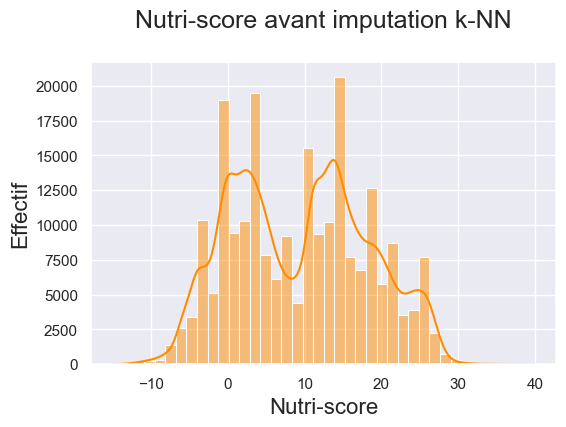

In [67]:
# Distribution de nutriscore avant imputation
p = sns.histplot(x=data_dropped["nutriscore_score"], kde=True, bins=40, color = "darkorange")
p.set_xlabel ("Nutri-score", fontsize=16)
p.set_ylabel ("Effectif", fontsize=16)
p.set_title("Nutri-score avant imputation k-NN\n", fontsize=18)
plt.show()

Text(0.5, 1.0, 'Nutri-score de la catégorie ‘unknown’ après imputation KNN\n')

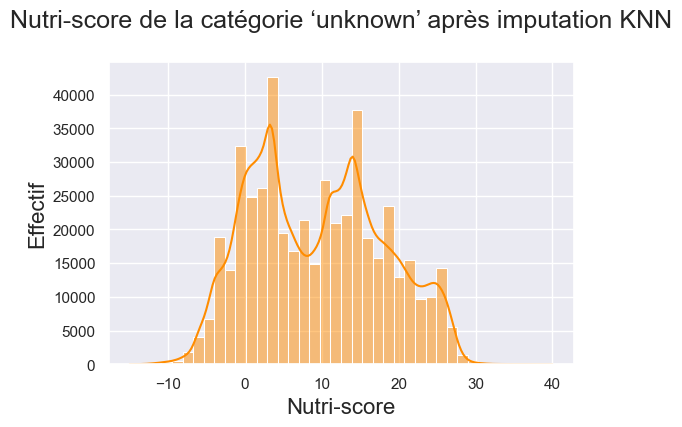

In [40]:
# Distribution de nutriscore après imputation
p = sns.histplot(x=data_imputed["nutriscore_score"], kde=True, bins=40, color = "darkorange")
p.set_xlabel ("Nutri-score", fontsize=16)
p.set_ylabel ("Effectif", fontsize=16)
p.set_title("Nutri-score de la catégorie ‘unknown’ après imputation KNN\n", fontsize=18)

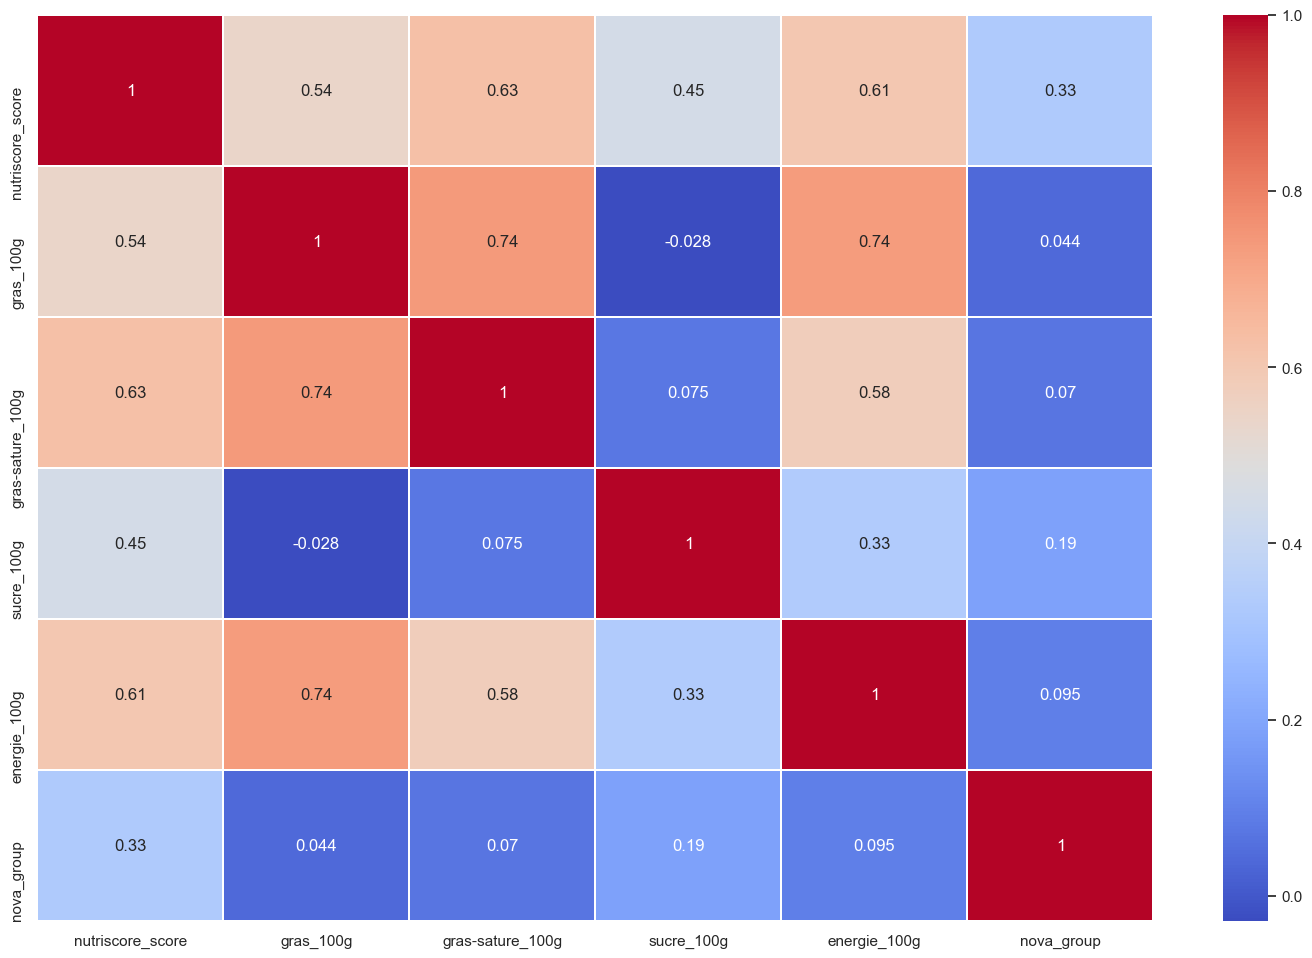

In [92]:
fig = plt.figure(figsize=(18,12))

sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', linewidths=.5)

fig.savefig('P3_Support/correlation_imp.png')

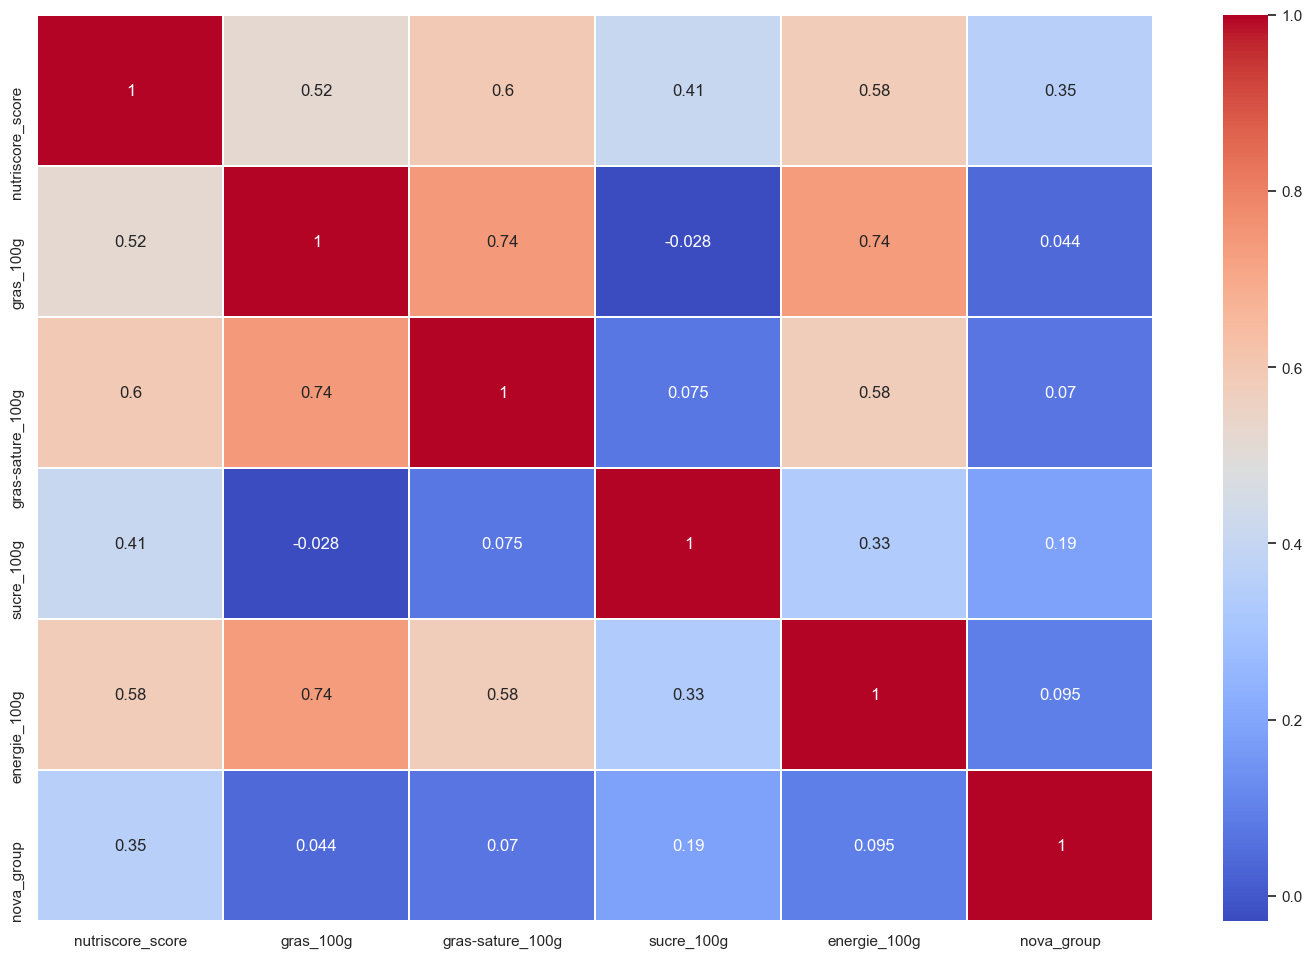

In [42]:
fig = plt.figure(figsize=(18,12))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)

fig.savefig('P3_Support/correlation__avant_imp.png')

In [93]:
print("moy après:",data_imputed["nutriscore_score"].mean())
print("med après:",data_imputed["nutriscore_score"].median())
print("std après:",data_imputed["nutriscore_score"].std(ddof=0))
print("skw après:",data_imputed["nutriscore_score"].skew())
print("kur après:",data_imputed["nutriscore_score"].kurtosis())

# La distribution de Nutriscore et les paramétres statistiques n'ont pas très changé après imputation

moy après: 9.427260159932828
med après: 9.333333333333334
std après: 8.605508394364007
skw après: 0.18722768368173523
kur après: -0.9207164670775105


In [94]:
print("moyenne avant:",data_dropped["nutriscore_score"].mean())
print("mediane avant:",data_dropped["nutriscore_score"].median())
print("std avant:",data_dropped["nutriscore_score"].std(ddof=0))
print("skw avant:",data_dropped["nutriscore_score"].skew())
print("kur avant:",data_dropped["nutriscore_score"].kurtosis())

moyenne avant: 9.429067262427193
mediane avant: 10.0
std avant: 8.828784403178467
skw avant: 0.11560477812197563
kur avant: -0.935612659072417
